<a href="https://colab.research.google.com/github/thimotyb/spark-notebooks/blob/main/Data_Analysis_with_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis with PySpark in Google Colab

PySpark is Python interface for Apache Spark. The primary use cases for PySpark are to work with huge amounts of data and for creating data pipelines.

You don't need to work with big data to benefit from PySpark. I find that the SparkSQL is a great tool for performing routine data anlysis. Pandas can get slow and you may find yourself writing a lot of code for data cleaning whereas the same actions take much less code in SQL. Let's get started!

See more here! http://spark.apache.org/docs/latest/api/python/

# 1. Installing PySpark in Google Colab

In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
#  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,031 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease


In [ ]:
spark

In [2]:
# Get more example data
!git clone https://github.com/thimotyb/DataAnalysisWithPythonAndPySpark-Data.git

Cloning into 'DataAnalysisWithPythonAndPySpark-Data'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71 (from 1)
Receiving objects: 100% (71/71), 828.81 MiB | 26.14 MiB/s, done.
Updating files: 100% (59/59), done.


In [5]:
!mv DataAnalysisWithPythonAndPySpark-Data /content/data

# PySpark Data Analysis Examples

## WordCount Example

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, explode, lower, regexp_extract

spark = SparkSession.builder.getOrCreate()

book = spark.read.text("data/gutenberg_books/1342-0.txt")

lines = book.select(split(book.value, " ").alias("line"))

words = lines.select(explode(col("line")).alias("word"))

words_lower = words.select(lower(col("word")).alias("word_lower"))

words_clean = words_lower.select(
    regexp_extract(col("word_lower"), "[a-z]*", 0).alias("word")
)

words_nonull = words_clean.where(col("word") != "")

In [ ]:
words_nonull.show(50)

+------------+
|        word|
+------------+
|         the|
|     project|
|   gutenberg|
|       ebook|
|          of|
|       pride|
|         and|
|   prejudice|
|          by|
|        jane|
|      austen|
|        this|
|       ebook|
|          is|
|         for|
|         the|
|         use|
|          of|
|      anyone|
|    anywhere|
|          at|
|          no|
|        cost|
|         and|
|        with|
|      almost|
|          no|
|restrictions|
|  whatsoever|
|         you|
|         may|
|        copy|
|          it|
|        give|
|          it|
|        away|
|          or|
|          re|
|          it|
|       under|
|         the|
|       terms|
|          of|
|         the|
|     project|
|   gutenberg|
|     license|
|    included|
|        with|
|        this|
+------------+
only showing top 50 rows



In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder.getOrCreate()

In [ ]:
(
    spark.read.csv("./data/list_of_numbers/sample.csv", header=True)
    .withColumn(
        "new_column", F.when(F.col("old_column") > 10, 10).otherwise(0)
    )
    .where("old_column > 8")
    .groupby("new_column")
    .count()
    .write.csv("updated_frequencies.csv", mode="overwrite")
)

# Using PySpark

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder.getOrCreate()

In [ ]:
my_grocery_list = [
    ["Banana", 2, 1.74],
    ["Apple", 4, 2.04],
    ["Carrot", 1, 1.09],
    ["Cake", 1, 10.99],
]

df_grocery_list = spark.createDataFrame(
    my_grocery_list, ["Item", "Quantity", "Price"]
)

df_grocery_list.printSchema()

root
 |-- Item: string (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Price: double (nullable = true)



In [ ]:
df_grocery_list.select("Item", "Price").where("Price > 2").show()

+-----+-----+
| Item|Price|
+-----+-----+
|Apple| 2.04|
| Cake|10.99|
+-----+-----+



In [ ]:
DIRECTORY = "data/broadcast_logs"
logs = (
    spark.read.csv(
        os.path.join(DIRECTORY, "BroadcastLogs_2018_Q3_M8_sample.CSV"),
        sep="|",
        header=True,
        inferSchema=True,
        timestampFormat="yyyy-MM-dd",
    ))

In [ ]:
logs.select("BroadcastLogID", "LogServiceID", "LogDate").show(5, False)

+--------------+------------+----------+
|BroadcastLogID|LogServiceID|LogDate   |
+--------------+------------+----------+
|1196192316    |3157        |2018-08-01|
|1196192317    |3157        |2018-08-01|
|1196192318    |3157        |2018-08-01|
|1196192319    |3157        |2018-08-01|
|1196192320    |3157        |2018-08-01|
+--------------+------------+----------+
only showing top 5 rows



In [ ]:
# Using the string to column conversion
logs.select("BroadCastLogID", "LogServiceID", "LogDate")
logs.select(*["BroadCastLogID", "LogServiceID", "LogDate"])

# Passing the column object explicitly
logs.select(
    F.col("BroadCastLogID"), F.col("LogServiceID"), F.col("LogDate")
)
logs.select(
    *[F.col("BroadCastLogID"), F.col("LogServiceID"), F.col("LogDate")]
)

DataFrame[BroadCastLogID: int, LogServiceID: int, LogDate: date]

In [ ]:
import numpy as np

column_split = np.array_split(
    np.array(logs.columns), len(logs.columns) // 3
)

In [ ]:
column_split

[array(['BroadcastLogID', 'LogServiceID', 'LogDate'], dtype='<U22'),
 array(['SequenceNO', 'AudienceTargetAgeID', 'AudienceTargetEthnicID'],
       dtype='<U22'),
 array(['CategoryID', 'ClosedCaptionID', 'CountryOfOriginID'], dtype='<U22'),
 array(['DubDramaCreditID', 'EthnicProgramID', 'ProductionSourceID'],
       dtype='<U22'),
 array(['ProgramClassID', 'FilmClassificationID', 'ExhibitionID'],
       dtype='<U22'),
 array(['Duration', 'EndTime', 'LogEntryDate'], dtype='<U22'),
 array(['ProductionNO', 'ProgramTitle', 'StartTime'], dtype='<U22'),
 array(['Subtitle', 'NetworkAffiliationID', 'SpecialAttentionID'],
       dtype='<U22'),
 array(['BroadcastOriginPointID', 'CompositionID', 'Producer1'],
       dtype='<U22'),
 array(['Producer2', 'Language1', 'Language2'], dtype='<U22')]

In [ ]:
for x in column_split:
    logs.select(*x).show(5, False)

+--------------+------------+----------+
|BroadcastLogID|LogServiceID|LogDate   |
+--------------+------------+----------+
|1196192316    |3157        |2018-08-01|
|1196192317    |3157        |2018-08-01|
|1196192318    |3157        |2018-08-01|
|1196192319    |3157        |2018-08-01|
|1196192320    |3157        |2018-08-01|
+--------------+------------+----------+
only showing top 5 rows

+----------+-------------------+----------------------+
|SequenceNO|AudienceTargetAgeID|AudienceTargetEthnicID|
+----------+-------------------+----------------------+
|1         |4                  |NULL                  |
|2         |NULL               |NULL                  |
|3         |NULL               |NULL                  |
|4         |NULL               |NULL                  |
|5         |NULL               |NULL                  |
+----------+-------------------+----------------------+
only showing top 5 rows

+----------+---------------+-----------------+
|CategoryID|ClosedCaptionID|Co

In [57]:
DIRECTORY = "data/broadcast_logs"
logs = (
    spark.read.csv(
        os.path.join(DIRECTORY, "BroadcastLogs_2018_Q3_M8_sample.CSV"),
        sep="|",
        header=True,
        inferSchema=True,
        timestampFormat="yyyy-MM-dd",
    )
    .drop("BroadcastLogID", "SequenceNO")
    .withColumn(
        "duration_seconds",
        (
            F.col("Duration").substr(1, 2).cast("int") * 60 * 60
            + F.col("Duration").substr(4, 2).cast("int") * 60
            + F.col("Duration").substr(7, 2).cast("int")
        ),
    )
)

In [53]:
logs.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

In [26]:
logs.select(F.col("Duration")).show(5)

+----------------+
|        Duration|
+----------------+
|02:00:00.0000000|
|00:00:30.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
+----------------+
only showing top 5 rows



In [54]:
logs.select(F.col("duration_seconds")).show(5)

+----------------+
|duration_seconds|
+----------------+
|            7200|
|              30|
|              15|
|              15|
|              15|
+----------------+
only showing top 5 rows



In [ ]:
print(logs.select(F.col("Duration")).dtypes)

[('Duration', 'string')]


In [49]:
logs.select(
    F.col("Duration"),
    F.col("Duration").substr(1, 2).cast("int").alias("dur_hours"),
    F.col("Duration").substr(4, 2).cast("int").alias("dur_minutes"),
    F.col("Duration").substr(7, 2).cast("int").alias("dur_seconds"),
).distinct().show(
    5
)

+----------------+---------+-----------+-----------+
|        Duration|dur_hours|dur_minutes|dur_seconds|
+----------------+---------+-----------+-----------+
|00:04:52.0000000|        0|          4|         52|
|00:10:06.0000000|        0|         10|          6|
|00:26:41.0000000|        0|         26|         41|
|00:05:29.0000000|        0|          5|         29|
|00:08:18.0000000|        0|          8|         18|
+----------------+---------+-----------+-----------+
only showing top 5 rows



In [50]:
logs.select(
    F.col("Duration"),
    (
        F.col("Duration").substr(1, 2).cast("int") * 60 * 60
        + F.col("Duration").substr(4, 2).cast("int") * 60
        + F.col("Duration").substr(7, 2).cast("int")
    ).alias("Duration_seconds"),
).distinct().show(5)

+----------------+----------------+
|        Duration|Duration_seconds|
+----------------+----------------+
|01:59:30.0000000|            7170|
|00:31:00.0000000|            1860|
|00:28:08.0000000|            1688|
|00:10:30.0000000|             630|
|00:32:00.0000000|            1920|
+----------------+----------------+
only showing top 5 rows



In [ ]:
#for i in logs.columns:
#    logs.describe(i).show()

for i in logs.columns:
    logs.select(i).summary().show()

+-------+--------------------+
|summary|      BroadcastLogID|
+-------+--------------------+
|  count|              238945|
|   mean|1.2168651122760174E9|
| stddev| 1.496913424143109E7|
|    min|          1195788151|
|    25%|          1204679733|
|    50%|          1213242718|
|    75%|          1226220079|
|    max|          1249431576|
+-------+--------------------+

+-------+------------------+
|summary|      LogServiceID|
+-------+------------------+
|  count|            238945|
|   mean| 3450.890284375065|
| stddev|199.50673962555592|
|    min|              3157|
|    25%|              3287|
|    50%|              3379|
|    75%|              3627|
|    max|              3925|
+-------+------------------+

+-------+
|summary|
+-------+
|  count|
|   mean|
| stddev|
|    min|
|    25%|
|    50%|
|    75%|
|    max|
+-------+

+-------+-----------------+
|summary|       SequenceNO|
+-------+-----------------+
|  count|           238945|
|   mean|466.3855824562138|
| stddev|311.5109

In [28]:
DIRECTORY = "data/broadcast_logs"
log_identifier = spark.read.csv(
    os.path.join(DIRECTORY, "ReferenceTables/LogIdentifier.csv"),
    sep="|",
    header=True,
    inferSchema=True,
)

log_identifier.printSchema()

root
 |-- LogIdentifierID: string (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- PrimaryFG: integer (nullable = true)



In [29]:
log_identifier.show(5)

+---------------+------------+---------+
|LogIdentifierID|LogServiceID|PrimaryFG|
+---------------+------------+---------+
|           13ST|        3157|        1|
|         2000SM|        3466|        1|
|           70SM|        3883|        1|
|           80SM|        3590|        1|
|           90SM|        3470|        1|
+---------------+------------+---------+
only showing top 5 rows



In [60]:
logs_and_channels_verbose = logs.join(
    log_identifier, logs["LogServiceID"] == log_identifier["LogServiceID"]
)

logs_and_channels_verbose.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

In [61]:
logs_and_channels = logs.join(log_identifier, "LogServiceID")

logs_and_channels.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

In [62]:
DIRECTORY = "data/broadcast_logs"

cd_category = spark.read.csv(
    os.path.join(DIRECTORY, "ReferenceTables/CD_Category.csv"),
    sep="|",
    header=True,
    inferSchema=True,
).select(
    "CategoryID",
    "CategoryCD",
    F.col("EnglishDescription").alias("Category_Description"),
)

cd_program_class = spark.read.csv(
    os.path.join(DIRECTORY, "ReferenceTables/CD_ProgramClass.csv"),
    sep="|",
    header=True,
    inferSchema=True,
).select(
    "ProgramClassID",
    "ProgramClassCD",
    F.col("EnglishDescription").alias("ProgramClass_Description"),
)

full_log = logs_and_channels.join(cd_category, "CategoryID", how="left").join(
    cd_program_class, "ProgramClassID", how="left"
)

In [63]:
full_log.show(10)

+--------------+----------+------------+----------+-------------------+----------------------+---------------+-----------------+----------------+---------------+------------------+--------------------+------------+----------------+----------------+------------+------------+--------------------+----------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+----------------+---------------+---------+----------+--------------------+--------------+------------------------+
|ProgramClassID|CategoryID|LogServiceID|   LogDate|AudienceTargetAgeID|AudienceTargetEthnicID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|FilmClassificationID|ExhibitionID|        Duration|         EndTime|LogEntryDate|ProductionNO|        ProgramTitle|       StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|Language2|duration

In [64]:
(full_log
 .groupby("ProgramClassCD", "ProgramClass_Description")
 .agg(F.sum("duration_seconds").alias("duration_total"))
 .orderBy("duration_total", ascending=False).show(100, False)
 )

+--------------+--------------------------------------+--------------+
|ProgramClassCD|ProgramClass_Description              |duration_total|
+--------------+--------------------------------------+--------------+
|PGR           |PROGRAM                               |20992510      |
|COM           |COMMERCIAL MESSAGE                    |3519163       |
|PFS           |PROGRAM FIRST SEGMENT                 |1344762       |
|SEG           |SEGMENT OF A PROGRAM                  |1205998       |
|PRC           |PROMOTION OF UPCOMING CANADIAN PROGRAM|880600        |
|PGI           |PROGRAM INFOMERCIAL                   |679182        |
|PRO           |PROMOTION OF NON-CANADIAN PROGRAM     |335701        |
|OFF           |SCHEDULED OFF AIR TIME PERIOD         |142279        |
|ID            |NETWORK IDENTIFICATION MESSAGE        |74926         |
|NRN           |No recognized nationality             |59686         |
|MAG           |MAGAZINE PROGRAM                      |57622         |
|PSA  

In [65]:
mytest = full_log.groupby("LogIdentifierID").agg(
        F.sum(
            "duration_seconds"
            ).alias("duration_commercial")
        )
mytest = mytest.filter(mytest["duration_commercial"].isNotNull())
mytest.show(100, False)

+---------------+-------------------+
|LogIdentifierID|duration_commercial|
+---------------+-------------------+
|CJCO           |106174             |
|BRAVO          |108920             |
|CFTF           |1805               |
|CKCS           |97158              |
|CJNT           |112904             |
|CKES           |97019              |
|CHBX           |108007             |
|BBCKID         |92104              |
|BOOK           |105885             |
|CHAN           |107938             |
|CEVASI         |107180             |
|CMT            |108942             |
|CIII           |107812             |
|CFMT           |102688             |
|CFGS           |91500              |
|CBKT           |103410             |
|CHEK           |100372             |
|CFCF           |107878             |
|CBXT           |103810             |
|CIVM           |11802              |
|CESS           |105700             |
|CBHT           |103779             |
|CICC           |107731             |
|CFTM       

In [66]:
# When the field of the column ProgramClass, trimmed of spaces at the beginning and end of the field,
# is in our list of commercial codes,
# then take the value of the field in the column duration_seconds. Otherwise, use zero as a value.
answer = (
    full_log.groupby("LogIdentifierID")
    .agg(
        F.sum(
            F.when(
                F.trim(F.col("ProgramClassCD")).isin(
                    ["COM", "PGR", "PGI", "PRO", "LOC", "SPO", "MER", "SOL"]
                ),
                F.col("duration_seconds"),
            ).otherwise(0)
        ).alias("duration_commercial"),
        F.sum("duration_seconds").alias("duration_total"),
    )
    .withColumn(
        "commercial_ratio", F.col("duration_commercial") / F.col("duration_total")
    )
    .fillna(0)
)

answer.orderBy("commercial_ratio", ascending=False).show(1000, False)

+---------------+-------------------+--------------+-------------------+
|LogIdentifierID|duration_commercial|duration_total|commercial_ratio   |
+---------------+-------------------+--------------+-------------------+
|CIMT           |775                |775           |1.0                |
|ATN6           |97121              |97121         |1.0                |
|MOVIEP         |86400              |86400         |1.0                |
|ATN13          |86400              |86400         |1.0                |
|SKIN           |86400              |86400         |1.0                |
|SNONE          |1800               |1800          |1.0                |
|TIMESN         |86400              |86400         |1.0                |
|MPIX2          |86400              |86400         |1.0                |
|OTN3           |86400              |86400         |1.0                |
|TMN3           |86400              |86400         |1.0                |
|PLAY           |86400              |86400         

In [67]:
# Convert to pandas dataframe
df = answer.orderBy("commercial_ratio", ascending=False).toPandas()

In [68]:
df.head(100)

,LogIdentifierID,duration_commercial,duration_total,commercial_ratio
0,CIMT,775,775,1.000000
1,ATN6,97121,97121,1.000000
2,MOVIEP,86400,86400,1.000000
3,ATN13,86400,86400,1.000000
4,SKIN,86400,86400,1.000000
...,...,...,...,...
95,OMON,102173,105457,0.968859
96,CJMT,102502,105811,0.968727
97,FAMCHA,83685,86400,0.968576
98,CBOT,100460,103732,0.968457


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LogIdentifierID      324 non-null    object 
 1   duration_commercial  324 non-null    int64  
 2   duration_total       324 non-null    int64  
 3   commercial_ratio     324 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.2+ KB


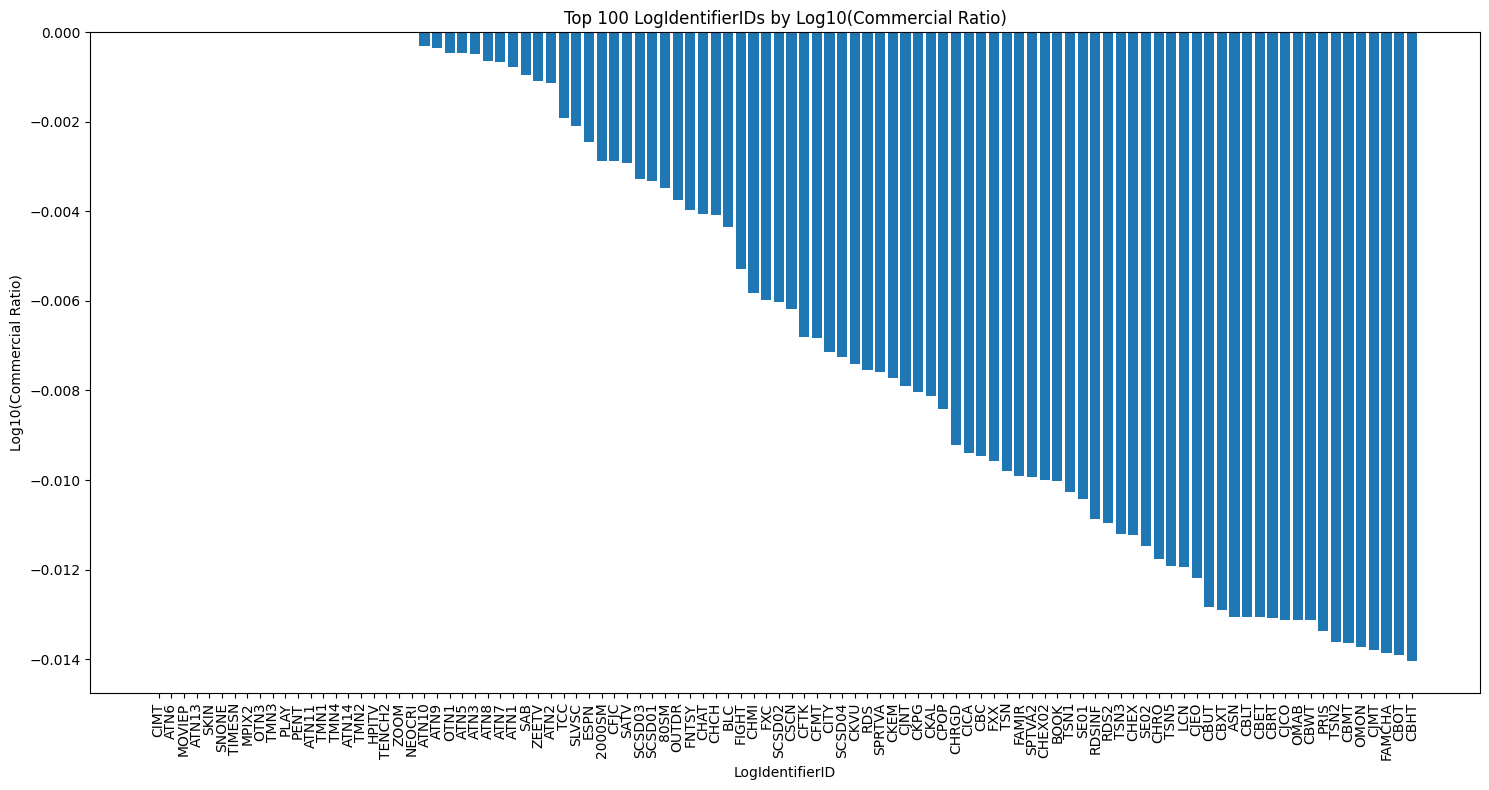

In [71]:
# prompt: using df plot a bar chart with the first top 100 log base 10 of commercial_ratio

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your Pandas DataFrame with 'LogIdentifierID' and 'commercial_ratio' columns

# Take the top 100 rows ordered by commercial_ratio
top_100_df = df.nlargest(100, 'commercial_ratio')

# Calculate the base 10 logarithm of commercial_ratio
top_100_df['log10_commercial_ratio'] = np.log10(top_100_df['commercial_ratio'])

# Create a bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_100_df['LogIdentifierID'].astype(str), top_100_df['log10_commercial_ratio'])
plt.xlabel('LogIdentifierID')
plt.ylabel('Log10(Commercial Ratio)')
plt.title('Top 100 LogIdentifierIDs by Log10(Commercial Ratio)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


# Using JSON Data With Spark

In [72]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
shows = spark.read.json("data/shows/shows-silicon-valley.json")
shows.count()

1

In [74]:
shows.show(1)

+--------------------+--------------------+--------------------+--------+---+--------------------+--------+--------------+--------------------+--------------------+----------+------+-------+-----------------+------+--------------------+--------+----------+--------------------+----------+------+
|           _embedded|              _links|           externals|  genres| id|               image|language|          name|             network|        officialSite| premiered|rating|runtime|         schedule|status|             summary|    type|   updated|                 url|webChannel|weight|
+--------------------+--------------------+--------------------+--------+---+--------------------+--------+--------------+--------------------+--------------------+----------+------+-------+-----------------+------+--------------------+--------+----------+--------------------+----------+------+
|{[{{{http://api.t...|{{http://api.tvma...|{tt2575988, 27716...|[Comedy]|143|{http://static.tv...| English|Silic

In [75]:
three_shows = spark.read.json("data/shows/shows-*.json", multiLine=True)
three_shows.show()

+--------------------+--------------------+--------------------+--------------------+---+--------------------+--------+----------------+--------------------+--------------------+----------+------+-------+-------------------+------+--------------------+--------+----------+--------------------+------------------+------+
|           _embedded|              _links|           externals|              genres| id|               image|language|            name|             network|        officialSite| premiered|rating|runtime|           schedule|status|             summary|    type|   updated|                 url|        webChannel|weight|
+--------------------+--------------------+--------------------+--------------------+---+--------------------+--------+----------------+--------------------+--------------------+----------+------+-------+-------------------+------+--------------------+--------+----------+--------------------+------------------+------+
|{[{{{http://api.t...|{{http://api.tvma.

In [76]:
shows.printSchema()

root
 |-- _embedded: struct (nullable = true)
 |    |-- episodes: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- _links: struct (nullable = true)
 |    |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- airdate: string (nullable = true)
 |    |    |    |-- airstamp: string (nullable = true)
 |    |    |    |-- airtime: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- image: struct (nullable = true)
 |    |    |    |    |-- medium: string (nullable = true)
 |    |    |    |    |-- original: string (nullable = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- number: long (nullable = true)
 |    |    |    |-- runtime: long (nullable = true)
 |    |    |    |-- season: long (nullable = true)
 |    |    |    |-- summary: string (nullable = true)
 |    |    |    |-- url: string (nullable = true

## Manipulating Arrays

In [79]:
array_subset = three_shows.select("name", "genres")
array_subset.show()

+----------------+--------------------+
|            name|              genres|
+----------------+--------------------+
|The Golden Girls|     [Drama, Comedy]|
|    Breaking Bad|[Drama, Crime, Th...|
|  Silicon Valley|            [Comedy]|
+----------------+--------------------+



In [80]:
import pyspark.sql.functions as F

array_subset = array_subset.select(
    "name",
    array_subset.genres[0].alias("dot_and_index"),
    F.col("genres")[0].alias("col_and_index"),
    array_subset.genres.getItem(0).alias("dot_and_method"),
    F.col("genres").getItem(0).alias("col_and_method"),
)

array_subset.show()

+----------------+-------------+-------------+--------------+--------------+
|            name|dot_and_index|col_and_index|dot_and_method|col_and_method|
+----------------+-------------+-------------+--------------+--------------+
|The Golden Girls|        Drama|        Drama|         Drama|         Drama|
|    Breaking Bad|        Drama|        Drama|         Drama|         Drama|
|  Silicon Valley|       Comedy|       Comedy|        Comedy|        Comedy|
+----------------+-------------+-------------+--------------+--------------+



In [94]:
array_subset_repeated = array_subset.select(
    "name",
    F.lit("Comedy").alias("one"),
    F.lit("Horror").alias("two"),
    F.lit("Drama").alias("three"),
    F.col("dot_and_index"),
).select(
    "name",
    F.array("one", "two", "three").alias("Some_Genres"),
    F.array_repeat("dot_and_index", 5).alias("Repeated_Genres"),
)

array_subset_repeated.show()

+----------------+--------------------+--------------------+
|            name|         Some_Genres|     Repeated_Genres|
+----------------+--------------------+--------------------+
|The Golden Girls|[Comedy, Horror, ...|[Drama, Drama, Dr...|
|    Breaking Bad|[Comedy, Horror, ...|[Drama, Drama, Dr...|
|  Silicon Valley|[Comedy, Horror, ...|[Comedy, Comedy, ...|
+----------------+--------------------+--------------------+



In [95]:
array_subset_repeated.select(
    "name", F.size("Some_Genres"), F.size("Repeated_Genres")
).show()

+----------------+-----------------+---------------------+
|            name|size(Some_Genres)|size(Repeated_Genres)|
+----------------+-----------------+---------------------+
|The Golden Girls|                3|                    5|
|    Breaking Bad|                3|                    5|
|  Silicon Valley|                3|                    5|
+----------------+-----------------+---------------------+



In [96]:
array_subset_repeated.select(
    "name",
    F.array_distinct("Some_Genres"),
    F.array_distinct("Repeated_Genres"),
).show(truncate=False)

+----------------+---------------------------+-------------------------------+
|name            |array_distinct(Some_Genres)|array_distinct(Repeated_Genres)|
+----------------+---------------------------+-------------------------------+
|The Golden Girls|[Comedy, Horror, Drama]    |[Drama]                        |
|Breaking Bad    |[Comedy, Horror, Drama]    |[Drama]                        |
|Silicon Valley  |[Comedy, Horror, Drama]    |[Comedy]                       |
+----------------+---------------------------+-------------------------------+



In [97]:
array_subset_repeated = array_subset_repeated.select(
    "name",
    F.array_intersect("Some_Genres", "Repeated_Genres").alias(
        "Genres"
    ),
)

array_subset_repeated.show()

+----------------+--------+
|            name|  Genres|
+----------------+--------+
|The Golden Girls| [Drama]|
|    Breaking Bad| [Drama]|
|  Silicon Valley|[Comedy]|
+----------------+--------+



In [98]:
array_subset_repeated.select(
    "Genres", F.array_position("Genres", "Comedy")
).show()

+--------+------------------------------+
|  Genres|array_position(Genres, Comedy)|
+--------+------------------------------+
| [Drama]|                             0|
| [Drama]|                             0|
|[Comedy]|                             1|
+--------+------------------------------+



## Manipulating Maps

In [99]:
columns = ["name", "language", "type"]

shows_map = three_shows.select(
    *[F.lit(column) for column in columns],
    F.array(*columns).alias("values"),
)

shows_map = shows_map.select(F.array(*columns).alias("keys"), "values")

shows_map.show(truncate=False)

+----------------------+-------------------------------------+
|keys                  |values                               |
+----------------------+-------------------------------------+
|[name, language, type]|[The Golden Girls, English, Scripted]|
|[name, language, type]|[Breaking Bad, English, Scripted]    |
|[name, language, type]|[Silicon Valley, English, Scripted]  |
+----------------------+-------------------------------------+



In [100]:
shows_map = shows_map.select(
    F.map_from_arrays("keys", "values").alias("mapped")
)

shows_map.printSchema()

root
 |-- mapped: map (nullable = false)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [101]:
shows_map.show(truncate=False)

+-----------------------------------------------------------------+
|mapped                                                           |
+-----------------------------------------------------------------+
|{name -> The Golden Girls, language -> English, type -> Scripted}|
|{name -> Breaking Bad, language -> English, type -> Scripted}    |
|{name -> Silicon Valley, language -> English, type -> Scripted}  |
+-----------------------------------------------------------------+



In [102]:
shows_map.select(
    F.col("mapped.name"),
    F.col("mapped")["name"],
    shows_map.mapped["name"],
).show()

+----------------+----------------+----------------+
|            name|    mapped[name]|    mapped[name]|
+----------------+----------------+----------------+
|The Golden Girls|The Golden Girls|The Golden Girls|
|    Breaking Bad|    Breaking Bad|    Breaking Bad|
|  Silicon Valley|  Silicon Valley|  Silicon Valley|
+----------------+----------------+----------------+



## Using structs
The struct is very different from the array and the map in that the number of fields and their names are known ahead of time. In our case, the schedule struct column is fixed.

In [103]:
shows.select("schedule").printSchema()

root
 |-- schedule: struct (nullable = true)
 |    |-- days: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- time: string (nullable = true)



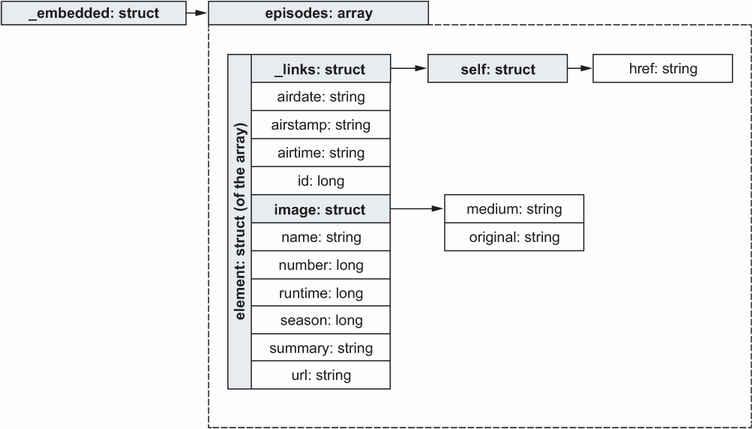

In [104]:
shows.select(F.col("_embedded")).printSchema()

root
 |-- _embedded: struct (nullable = true)
 |    |-- episodes: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- _links: struct (nullable = true)
 |    |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- airdate: string (nullable = true)
 |    |    |    |-- airstamp: string (nullable = true)
 |    |    |    |-- airtime: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- image: struct (nullable = true)
 |    |    |    |    |-- medium: string (nullable = true)
 |    |    |    |    |-- original: string (nullable = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- number: long (nullable = true)
 |    |    |    |-- runtime: long (nullable = true)
 |    |    |    |-- season: long (nullable = true)
 |    |    |    |-- summary: string (nullable = true)
 |    |    |    |-- url: string (nullable = true

In [105]:
shows_clean = shows.withColumn(
 "episodes", F.col("_embedded.episodes")
).drop("_embedded")

shows_clean.printSchema()

root
 |-- _links: struct (nullable = true)
 |    |-- previousepisode: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- externals: struct (nullable = true)
 |    |-- imdb: string (nullable = true)
 |    |-- thetvdb: long (nullable = true)
 |    |-- tvrage: long (nullable = true)
 |-- genres: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: long (nullable = true)
 |-- image: struct (nullable = true)
 |    |-- medium: string (nullable = true)
 |    |-- original: string (nullable = true)
 |-- language: string (nullable = true)
 |-- name: string (nullable = true)
 |-- network: struct (nullable = true)
 |    |-- country: struct (nullable = true)
 |    |    |-- code: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- timezone: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- name: string (nul

In [107]:
episodes_name = shows_clean.select(F.col("episodes.name"))
episodes_name.printSchema()

root
 |-- name: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [108]:
episodes_name.select(F.explode("name").alias("name")).show(truncate=False)

+-----------------------------+
|name                         |
+-----------------------------+
|Minimum Viable Product       |
|The Cap Table                |
|Articles of Incorporation    |
|Fiduciary Duties             |
|Signaling Risk               |
|Third Party Insourcing       |
|Proof of Concept             |
|Optimal Tip-to-Tip Efficiency|
|Sand Hill Shuffle            |
|Runaway Devaluation          |
|Bad Money                    |
|The Lady                     |
|Server Space                 |
|Homicide                     |
|Adult Content                |
|White Hat/Black Hat          |
|Binding Arbitration          |
|Two Days of the Condor       |
|Founder Friendly             |
|Two in the Box               |
+-----------------------------+
only showing top 20 rows



## Building a Spark DF from a JSON Schema

In [109]:
episode_links_schema = T.StructType(
    [
        T.StructField(
            "self", T.StructType([T.StructField("href", T.StringType())])
        )
    ]
)

episode_image_schema = T.StructType(
    [
        T.StructField("medium", T.StringType()),
        T.StructField("original", T.StringType()),
    ]
)

episode_schema = T.StructType(
    [
        T.StructField("_links", episode_links_schema),
        T.StructField("airdate", T.DateType()),
        T.StructField("airstamp", T.TimestampType()),
        T.StructField("airtime", T.StringType()),
        T.StructField("id", T.StringType()),
        T.StructField("image", episode_image_schema),
        T.StructField("name", T.StringType()),
        T.StructField("number", T.LongType()),
        T.StructField("runtime", T.LongType()),
        T.StructField("season", T.LongType()),
        T.StructField("summary", T.StringType()),
        T.StructField("url", T.StringType()),
    ]
)

embedded_schema = T.StructType(
    [
        T.StructField(
            "_embedded",
            T.StructType(
                [
                    T.StructField(
                        "episodes", T.ArrayType(episode_schema)
                    )
                ]
            ),
        )
    ]
)

In [110]:
shows_with_schema = spark.read.json(
    "data/shows/shows-silicon-valley.json",
    schema=embedded_schema,
    mode="FAILFAST",
)

In [111]:
for column in ["airdate", "airstamp"]:
    shows.select(f"_embedded.episodes.{column}").select(
        F.explode(column)
    ).show(5)

+----------+
|       col|
+----------+
|2014-04-06|
|2014-04-13|
|2014-04-20|
|2014-04-27|
|2014-05-04|
+----------+
only showing top 5 rows

+--------------------+
|                 col|
+--------------------+
|2014-04-07T02:00:...|
|2014-04-14T02:00:...|
|2014-04-21T02:00:...|
|2014-04-28T02:00:...|
|2014-05-05T02:00:...|
+--------------------+
only showing top 5 rows



In [112]:
import pprint

pprint.pprint(
    shows_with_schema.select(
        F.explode("_embedded.episodes").alias("episode")
    )
    .select("episode.airtime")
    .schema.jsonValue()
)

{'fields': [{'metadata': {},
             'name': 'airtime',
             'nullable': True,
             'type': 'string'}],
 'type': 'struct'}


## Some JSON manipulation examples

In [113]:
episodes = shows.select(
    "id", F.explode("_embedded.episodes").alias("episodes")
)
episodes.show(5, truncate=70)

+---+----------------------------------------------------------------------+
| id|                                                              episodes|
+---+----------------------------------------------------------------------+
|143|{{{http://api.tvmaze.com/episodes/10897}}, 2014-04-06, 2014-04-07T0...|
|143|{{{http://api.tvmaze.com/episodes/10898}}, 2014-04-13, 2014-04-14T0...|
|143|{{{http://api.tvmaze.com/episodes/10899}}, 2014-04-20, 2014-04-21T0...|
|143|{{{http://api.tvmaze.com/episodes/10900}}, 2014-04-27, 2014-04-28T0...|
|143|{{{http://api.tvmaze.com/episodes/10901}}, 2014-05-04, 2014-05-05T0...|
+---+----------------------------------------------------------------------+
only showing top 5 rows



In [114]:
# Exploding a map using posexplode()
episode_name_id = shows.select(
    F.map_from_arrays(
        F.col("_embedded.episodes.id"), F.col("_embedded.episodes.name")
    ).alias("name_id")
)

episode_name_id = episode_name_id.select(
    F.posexplode("name_id").alias("position", "id", "name")
)

episode_name_id.show(5)

+--------+-----+--------------------+
|position|   id|                name|
+--------+-----+--------------------+
|       0|10897|Minimum Viable Pr...|
|       1|10898|       The Cap Table|
|       2|10899|Articles of Incor...|
|       3|10900|    Fiduciary Duties|
|       4|10901|      Signaling Risk|
+--------+-----+--------------------+
only showing top 5 rows

